In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from Simulate import *
sim = Simulator()

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sim.detector.reset()

In [3]:
a = 0.6
v = 0.02
position = a*(2.*np.random.random(2)-[1.,1.])
velocity = v*(2.*np.random.random(2)-[1.,1.])

position = [0.,0.]
velocity = [0.05,0.001]

pt=np.linalg.norm(velocity)
phi=np.arctan2(velocity[1],velocity[0])
xVtx=position[0]
yVtx=position[1]

simtrack1=sim.propagate_direct([0.5,0.5],[2000.,100],id=0)
#simtrack2=sim.propagate_direct([0.2,0.2],[-100,2000], id=1)
#simtrack3=sim.propagate_direct([0.,0.],[-1000,100], id=2)
#simtrack4=sim.propagate_direct([0.,0.],[200,-500], id=3)

hits=sim.detector.getHits()

Particle id=0 at layer -1 iphi -1 (x,y)=(0.5,0.5) (px,py)=(2000.0,100.0)
tocenter= [ -333.33333333  6666.66666667    -0.        ]  radius= 6674.99479817
rotcenter= [ -332.83333333  6667.16666667     0.        ]
vintersect=  [[-38.97639559  -1.3566823    0.        ]
 [ 38.91772774   2.53189017   0.        ]]
newphipos= 0.0649659499511 iphi= 103 cell phi 0.0647168086639
Particle id=0 at layer 0 iphi 103 (x,y)=(38.9177277367,2.53189016549) (px,py)=(1997.73937047,137.976112761)
tocenter= [ -459.92037587  6659.13123488    -0.        ]  radius= 6674.99479817
rotcenter= [ -421.00264813  6661.66312505     0.        ]
vintersect=  [[-84.86080291  -4.86252295   0.        ]
 [ 84.7977941    5.85953208   0.        ]]
newphipos= 0.0689903871247 iphi= 109 cell phi 0.0684867198483
Particle id=0 at layer 1 iphi 109 (x,y)=(84.7977940975,5.85953207988) (px,py)=(1998.93749821,119.368665277)
tocenter= [ -397.89555092  6663.12499403    -0.        ]  radius= 6674.99479817
rotcenter= [ -313.09775683  6668.98

Simulate.py:157: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  self.history=self.history.sort(['particle','layer','hit'])


In [4]:
x=hits['x'].values
y=hits['y'].values
x
y


array([   2.52219407,    5.81682146,   10.31564316,   14.70978548,
         15.65651496,   23.9061821 ,   38.10716008,   60.26312192,
        100.98684116])

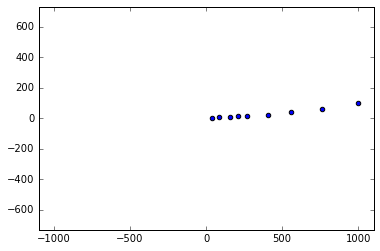

In [5]:
plt.scatter(x,y)
plt.axis('equal')

axes = plt.gca()
axes.set_xlim([-1100,1100])
axes.set_ylim([-1100,1100])

plt.show()

NameError: name 'simtrack2' is not defined

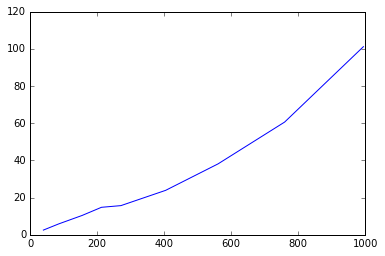

In [6]:
plt.plot(simtrack1['x'].values,simtrack1['y'].values)
plt.plot(simtrack2['x'].values,simtrack2['y'].values)
plt.plot(simtrack3['x'].values,simtrack3['y'].values)
plt.plot(simtrack4['x'].values,simtrack4['y'].values)

plt.scatter(x,y)
plt.axis('equal')

axes = plt.gca()
#axes.set_xlim([-2,2])
#axes.set_ylim([-2,2])

plt.show()

In [ ]:
simtrack1['x']

In [ ]:
sim.plot()

In [ ]:
sim.detector.cells_r

In [ ]:
from Fitting import *

In [ ]:
particle_df = hits.loc[hits['particle']==0]

In [ ]:
x=particle_df['x'].values
y=particle_df['y'].values

In [ ]:
fitter = TrackFitter(B=1.)

In [ ]:
x,y

In [ ]:
fitter.fit(x,y)

In [ ]:
def circular_path(x, r, vx, vy):
    return r - np.sqrt(r**2-(x-vx)**2) + vy


def rotateArray(x, y, phi):
    c, s = np.cos(phi), np.sin(phi)
    xr=c*x-s*y
    yr=s*x+c*y

    return xr,yr


def rotateToQuadrant(x,y):
    seedx=x[1]-x[0]
    seedy=y[1]-y[0]
    phi0=np.arctan2(y[0],x[0])
    phi1=np.arctan2(seedy,seedx)
    phi=phi1
    xr,yr=rotateArray(x,y,-phi)
    return xr,yr,phi

def fit(x,y):
    xr,yr,phi=rotateToQuadrant(x,y);
    p, cov = curve_fit(circular_path, xr, yr,
                       p0=[200.,0.,0.],
                       bounds=([5.,-25.,-25.],
                               [1000., 25, 25]
                               )
                       )

    r = p[0]
    pt = r
    vx = p[1]
    vy = p[2]
    chg = 1
    return  pt,phi,vx,vy,chg





In [ ]:
fit(x,y)

In [ ]:
aa=[]
aa+=[2]
aa+=[3]
aa